In [ ]:
'''
std name :
Mohammad Salah Ahmed

'''

# Loading the data

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/Twitter_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123311 entries, 0 to 123310
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  123310 non-null  object 
 1   category    123310 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [9]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
123306,modi sarkar has brought profound changes almos...,1.0
123307,why modi silent china toi editorials confront ...,0.0
123308,raga tried vry hard rafale the bludgeon accusa...,-1.0
123309,the first the world honble modi adopted villag...,1.0


# Data preprocessing

In [10]:
df.isnull().sum()

clean_text    1
category      1
dtype: int64

In [11]:
df.dropna(axis=0,inplace = True)
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
123305,\nbecause those who have directly benefitted f...,1.0
123306,modi sarkar has brought profound changes almos...,1.0
123307,why modi silent china toi editorials confront ...,0.0
123308,raga tried vry hard rafale the bludgeon accusa...,-1.0


In [12]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [15]:
from sklearn.model_selection import train_test_split

train_data , val_data = train_test_split(df , test_size=0.2 , random_state= 42)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 3000

oov_tok = 'oov'

embedding_dim = 16

max_length = 60

padding_type='post'
trunc_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data['clean_text'])
word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(train_data['clean_text'])
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)

X_val = tokenizer.texts_to_sequences(val_data['clean_text'])
X_val = pad_sequences(X_val, padding='post', maxlen=max_length)


y_train = train_data['category']
y_val = val_data['category']

In [17]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)


In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95.0% accuracy so cancelling training!")
            self.model.stop_training = True
callback = myCallback()


# Model implemination

In [19]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 16, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_conv = model_conv.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/5
3083/3083 [==============================] - 61s 17ms/step - loss: 0.4889 - accuracy: 0.8214 - val_loss: 0.2777 - val_accuracy: 0.9214
Epoch 2/5
3083/3083 [==============================] - 29s 9ms/step - loss: 0.2825 - accuracy: 0.9189 - val_loss: 0.2669 - val_accuracy: 0.9228
Epoch 3/5
3083/3083 [==============================] - 34s 11ms/step - loss: 0.2536 - accuracy: 0.9262 - val_loss: 0.2783 - val_accuracy: 0.9163
Epoch 4/5
3083/3083 [==============================] - 27s 9ms/step - loss: 0.2275 - accuracy: 0.9318 - val_loss: 0.2568 - val_accuracy: 0.9254
Epoch 5/5
3083/3083 [==============================] - 32s 10ms/step - loss: 0.2049 - accuracy: 0.9370 - val_loss: 0.2610 - val_accuracy: 0.9264


In [20]:
model_lstm = tf.keras.Sequential([

    tf.keras.layers.Embedding(3000 , 16 ,input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')

])


model_lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_lstm = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/5
3083/3083 [==============================] - 37s 12ms/step - loss: 0.4072 - accuracy: 0.8635 - val_loss: 0.2593 - val_accuracy: 0.9221
Epoch 2/5
3083/3083 [==============================] - 23s 7ms/step - loss: 0.2507 - accuracy: 0.9267 - val_loss: 0.2490 - val_accuracy: 0.9262
Epoch 3/5
3083/3083 [==============================] - 25s 8ms/step - loss: 0.2222 - accuracy: 0.9336 - val_loss: 0.2503 - val_accuracy: 0.9270
Epoch 4/5
3083/3083 [==============================] - 21s 7ms/step - loss: 0.1941 - accuracy: 0.9399 - val_loss: 0.2539 - val_accuracy: 0.9262
Epoch 5/5
3083/3083 [==============================] - 22s 7ms/step - loss: 0.1720 - accuracy: 0.9450 - val_loss: 0.3068 - val_accuracy: 0.9224


In [21]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/5
3083/3083 [==============================] - 663s 214ms/step - loss: 1.0605 - accuracy: 0.4439 - val_loss: 1.0576 - val_accuracy: 0.4470
Epoch 2/5
3083/3083 [==============================] - 651s 211ms/step - loss: 1.0593 - accuracy: 0.4439 - val_loss: 1.0574 - val_accuracy: 0.4470
Epoch 3/5
3083/3083 [==============================] - 652s 212ms/step - loss: 1.0591 - accuracy: 0.4439 - val_loss: 1.0569 - val_accuracy: 0.4470
Epoch 4/5
3083/3083 [==============================] - 621s 201ms/step - loss: 1.0589 - accuracy: 0.4439 - val_loss: 1.0569 - val_accuracy: 0.4470
Epoch 5/5
3083/3083 [==============================] - 613s 199ms/step - loss: 1.0589 - accuracy: 0.4439 - val_loss: 1.0569 - val_accuracy: 0.4470


In [48]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 units for 3 categories
])

flatten_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_flatten = flatten_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])


Epoch 1/5
3083/3083 [==============================] - 31s 10ms/step - loss: 0.4391 - accuracy: 0.8386 - val_loss: 0.3049 - val_accuracy: 0.9133
Epoch 2/5
3083/3083 [==============================] - 15s 5ms/step - loss: 0.2598 - accuracy: 0.9227 - val_loss: 0.2965 - val_accuracy: 0.9141
Epoch 3/5
3083/3083 [==============================] - 15s 5ms/step - loss: 0.2129 - accuracy: 0.9344 - val_loss: 0.3068 - val_accuracy: 0.9086
Epoch 4/5
3083/3083 [==============================] - 17s 6ms/step - loss: 0.1633 - accuracy: 0.9485 - val_loss: 0.3383 - val_accuracy: 0.9050
Epoch 5/5
3083/3083 [==============================] - 15s 5ms/step - loss: 0.1221 - accuracy: 0.9617 - val_loss: 0.4080 - val_accuracy: 0.8914


# conv Loss and Training plots

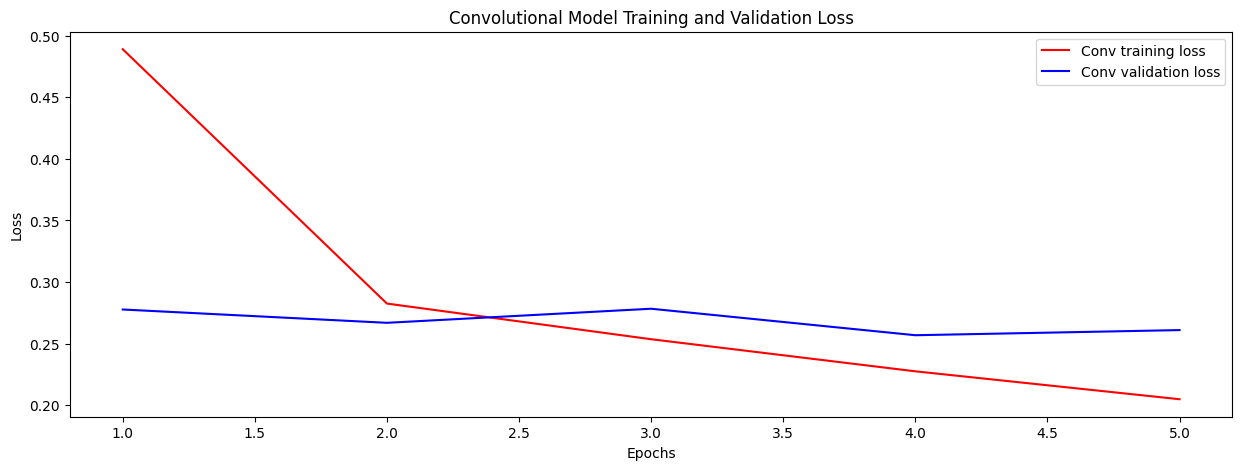

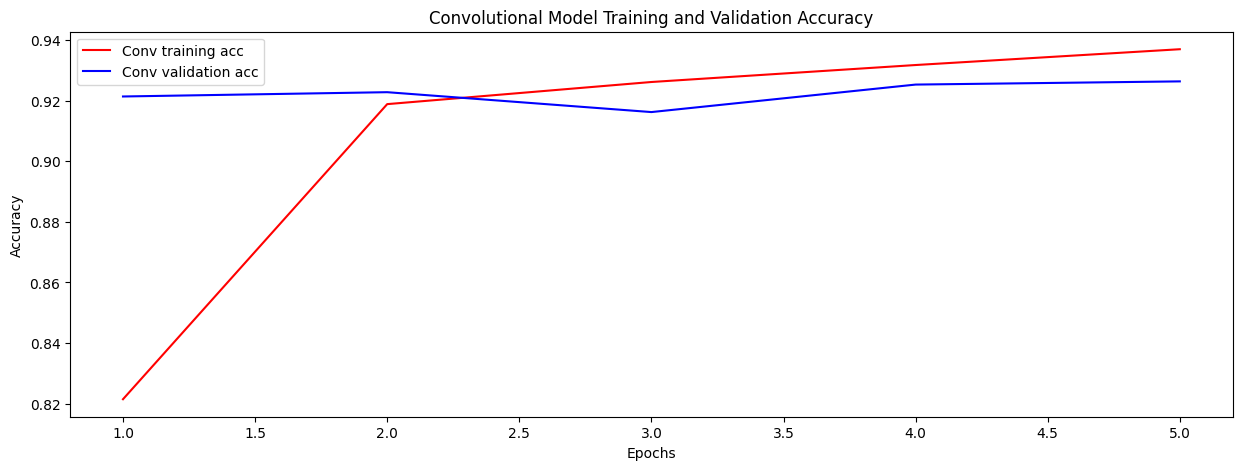

In [42]:
plt.figure(figsize=(15, 5))

plt.plot(epochs, conv_train_loss, 'r', label='Conv training loss')
plt.plot(epochs, conv_val_loss, 'b', label='Conv validation loss')
plt.title('Convolutional Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(15, 5))

plt.plot(epochs, conv_train_acc, 'r', label='Conv training acc')
plt.plot(epochs, conv_val_acc, 'b', label='Conv validation acc')
plt.title('Convolutional Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# LSTM Loss and Training plots

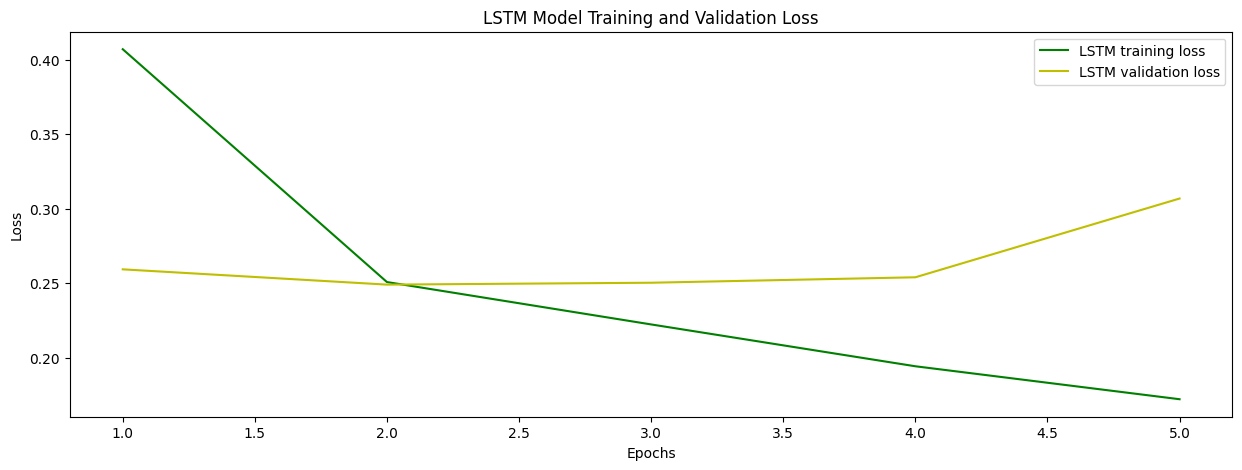

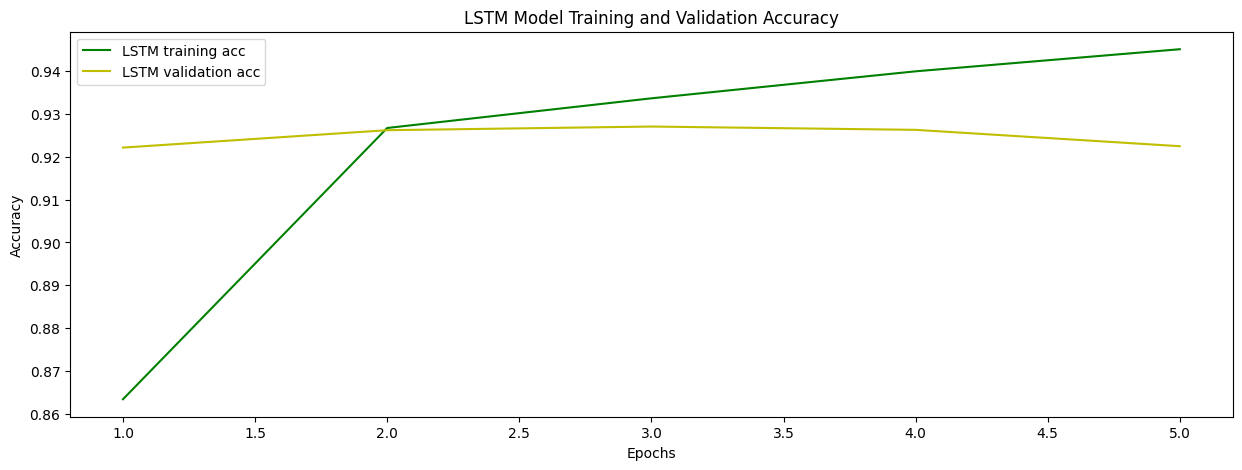

In [41]:
plt.figure(figsize=(15, 5))

plt.plot(epochs, lstm_train_loss, 'g', label='LSTM training loss')
plt.plot(epochs, lstm_val_loss, 'y', label='LSTM validation loss')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(15, 5))

plt.plot(epochs, lstm_train_acc, 'g', label='LSTM training acc')
plt.plot(epochs, lstm_val_acc, 'y', label='LSTM validation acc')
plt.title('LSTM Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# GRU Loss and Training plots

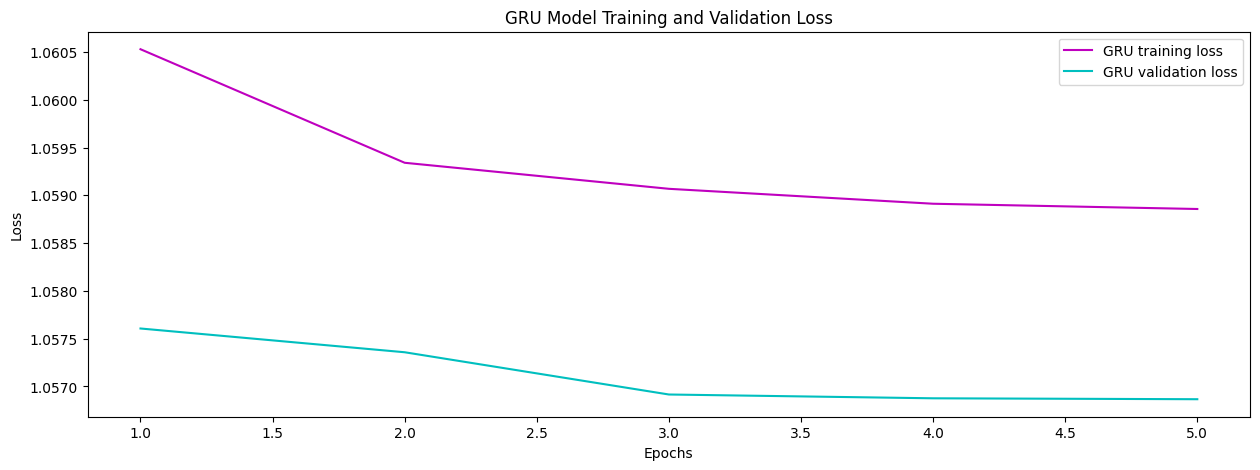

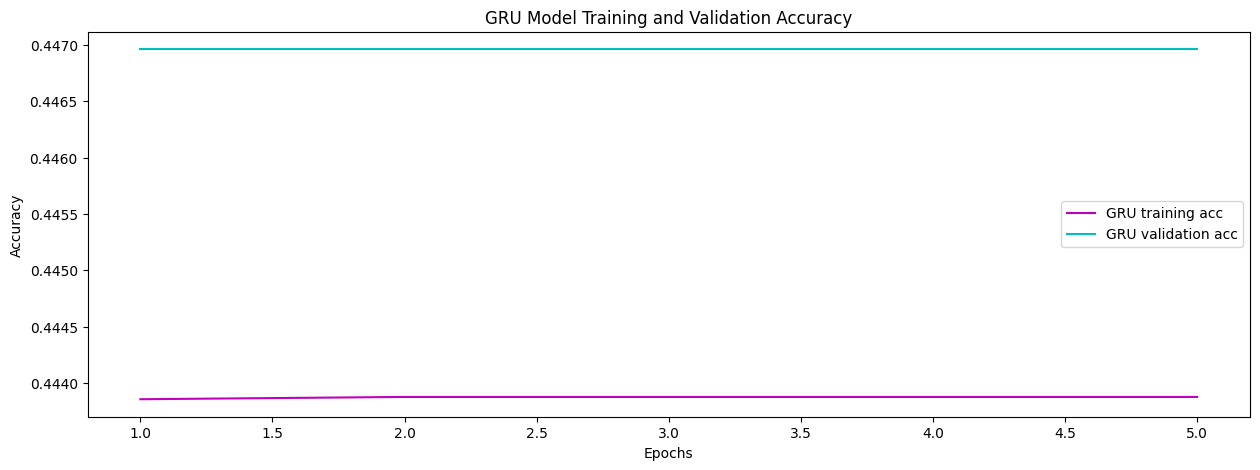

In [44]:
plt.figure(figsize=(15, 5))

plt.plot(epochs, gru_train_loss, 'm', label='GRU training loss')
plt.plot(epochs, gru_val_loss, 'c', label='GRU validation loss')
plt.title('GRU Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(15, 5))

plt.plot(epochs, gru_train_acc, 'm', label='GRU training acc')
plt.plot(epochs, gru_val_acc, 'c', label='GRU validation acc')
plt.title('GRU Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# Flatten Loss and Training plots

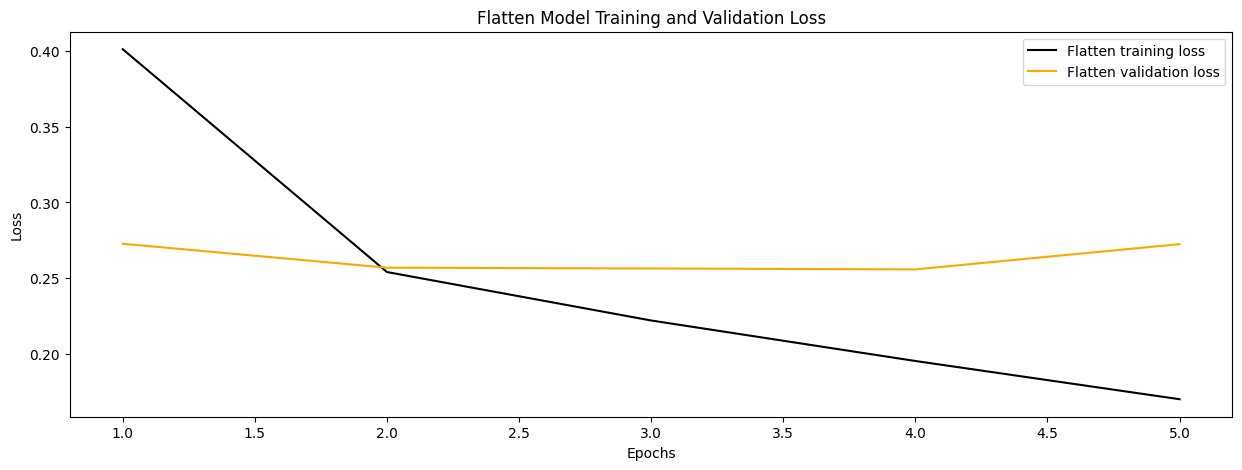

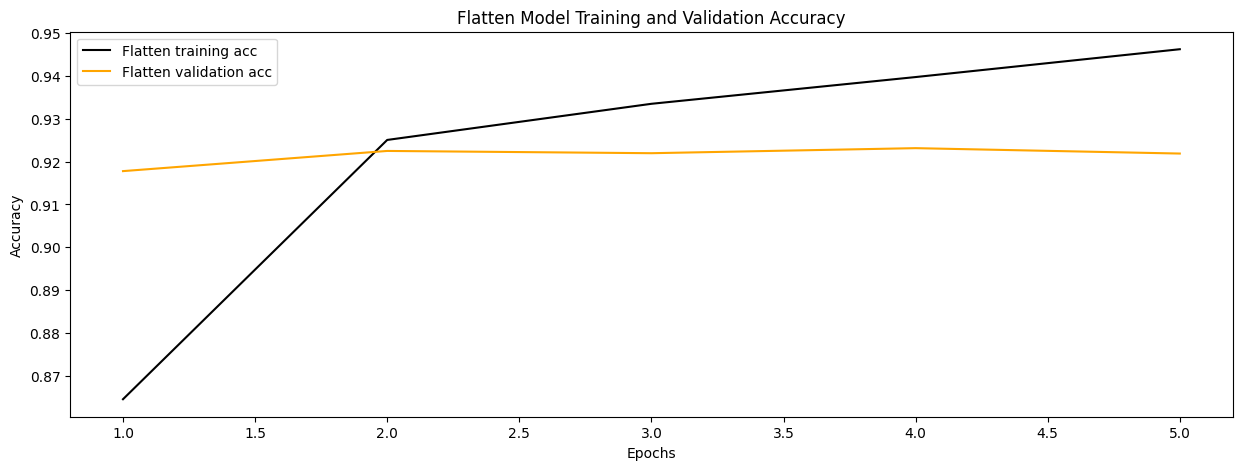

In [49]:
plt.figure(figsize=(15, 5))

plt.plot(epochs, flatten_train_loss, 'k', label='Flatten training loss')
plt.plot(epochs, flatten_val_loss, 'orange', label='Flatten validation loss')
plt.title('Flatten Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.figure(figsize=(15, 5))

plt.plot(epochs, flatten_train_acc, 'k', label='Flatten training acc')
plt.plot(epochs, flatten_val_acc, 'orange', label='Flatten validation acc')
plt.title('Flatten Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
